In [169]:
import openai, json, os, pandas as pd
from pprint import pprint
from wordcloud import wordcloud
from dotenv import load_dotenv

def connectOpenAI():
    load_dotenv()
    openai.api_key = os.getenv("API_KEY")
connectOpenAI()

## Demonstrating plotting modern words.

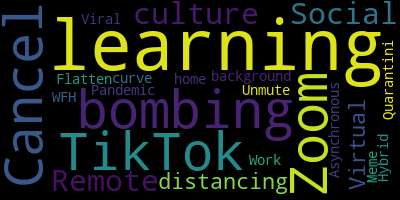

In [195]:
connectOpenAI()
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "system", "content": "Format the data in a JSON format only."},
              {"role": "user", "content": "List the top 15 modern words among college students from 2021. The key to the array is WORDS."}],
    temperature=0.5
)
data = response.choices[0].message.content
words = json.loads(data)['WORDS']
wordcloud.WordCloud().generate(" ".join(words)).to_image()

## Demonstrating plotting generated data from AI.

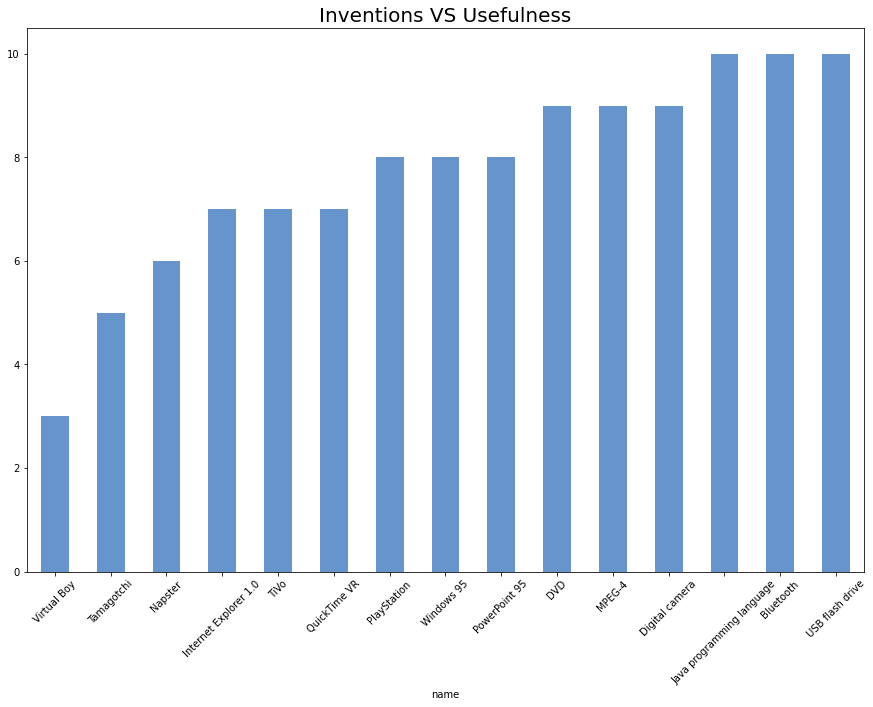

In [217]:
connectOpenAI()
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "system", "content": "Format the data in a JSON format only."},
              {"role": "user", "content": "List 15 inventions made in 1995, some ranging from not useful to very useful. Rank the usefulness 1-10. The key to the array is INVENTIONS."}],
    temperature=0
)
data = response.choices[0].message.content
inventions = json.loads(data)['INVENTIONS']
df = pd.DataFrame(inventions).sort_values(by='usefulness')
plt = df.plot.bar(x='name', y='usefulness', legend=False, rot=45, color='#6694cc', figsize=(15, 10))
plt.set_title("Inventions VS Usefulness").set_fontsize(20)
plt.tick_params(axis='both', labelsize=10)

Text(0.5, 1.0, 'Horsepower VS Sentiment')

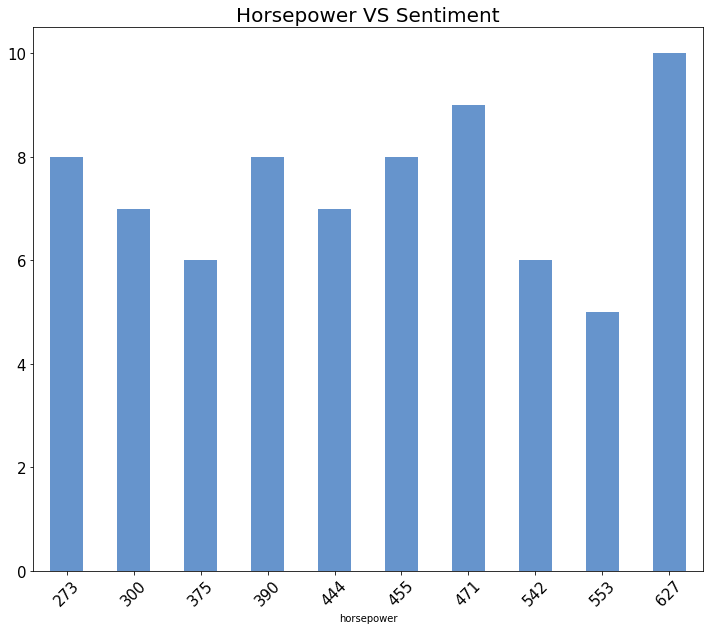

In [218]:
connectOpenAI()
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "system", "content": "Format the data in a JSON format only."},
              {"role": "user", "content": "List 10 supercars before 1995, their horsepower, and rate their sentiment from 1 to 10. The key to the array is CARS."}],
    temperature=0
)
data = response.choices[0].message.content
cars = json.loads(data)['CARS']
df = pd.DataFrame(cars).sort_values(by='horsepower')
plt = df.plot.bar(x='horsepower', y='sentiment', legend=False, rot=45, color='#6694cc', figsize=(12, 10))
plt.tick_params(axis='both', labelsize=15)
plt.set_title("Horsepower VS Sentiment", fontsize=20)

## Demonstrate generating random information with specific attributes.

In [90]:
connectOpenAI()
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "system", "content": "Format the data in a JSON format only."},
              {"role": "user", "content": "List 10 random identities including first and last name, email, major, and height. The key to the array is PEOPLE."}],
    temperature=0
)
data = response.choices[0].message.content
people = json.loads(data)['PEOPLE']
pd.DataFrame(people)

,firstName,lastName,email,major,height
0,Emily,Garcia,emily.garcia@example.com,Computer Science,"5'6"""
1,Jacob,Lee,jacob.lee@example.com,Business Administration,"6'0"""
2,Avery,Nguyen,avery.nguyen@example.com,Psychology,"5'4"""
3,Ethan,Wang,ethan.wang@example.com,Mechanical Engineering,"6'2"""
4,Sophia,Kim,sophia.kim@example.com,Biology,"5'7"""
5,Oliver,Chen,oliver.chen@example.com,Chemistry,"5'10"""
6,Isabella,Liu,isabella.liu@example.com,English,"5'5"""
7,William,Zhang,william.zhang@example.com,Electrical Engineering,"6'1"""
8,Mia,Wu,mia.wu@example.com,Political Science,"5'3"""
9,Lucas,Park,lucas.park@example.com,Computer Engineering,"5'11"""


Text(0.5, 1.0, 'Spiciness Level based on Country')

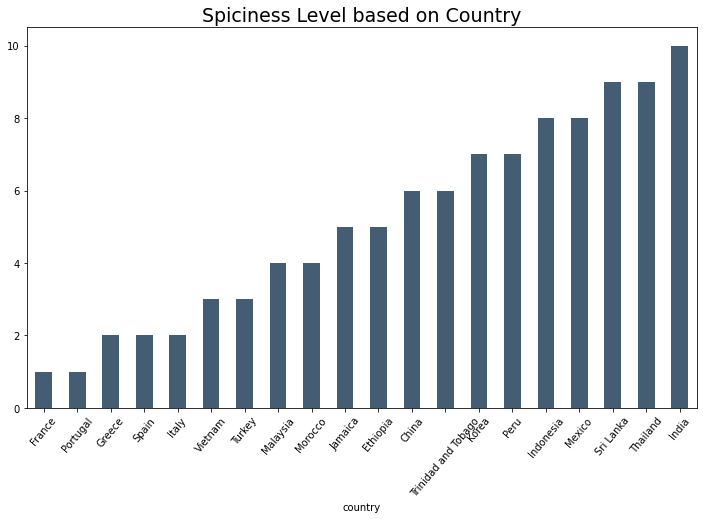

In [233]:
connectOpenAI()
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "system", "content": "Format the data in a JSON format only."},
              {"role": "user", "content": "List 20 food spiciness from 1-10 by country. The key to the array is SPICY."}],
    temperature=0
)
data = response.choices[0].message.content
spicy = json.loads(data)['SPICY']
df_spicy = pd.DataFrame(spicy)
plt = df_spicy.sort_values(by='spiciness').plot.bar(x='country', y='spiciness', figsize=(12, 7), legend=False, rot=55, color='#445d73')
plt.tick_params(axis='both',labelsize=10)
plt.set_title("Spiciness Level based on Country", fontsize=19)